In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

n_samples =200

In [20]:
# Define the dataset
data = {
    'Age': np.random.choice(['<30', '31-40', '>40'], size=n_samples),
    'Income': np.random.choice(['Low', 'Medium', 'High'], size=n_samples),
    'Student': np.random.choice(['No', 'Yes'], size=n_samples),
    'Credit Rating': np.random.choice(['Fair', 'Excellent'], size=n_samples),
    'Loan Approved': np.random.choice(['No', 'Yes'], size=n_samples)
}
print(data)

{'Age': array(['31-40', '>40', '>40', '<30', '31-40', '>40', '<30', '>40', '>40',
       '>40', '31-40', '>40', '31-40', '>40', '>40', '>40', '<30',
       '31-40', '<30', '>40', '<30', '>40', '31-40', '<30', '>40', '>40',
       '<30', '<30', '<30', '31-40', '<30', '31-40', '>40', '31-40',
       '31-40', '31-40', '31-40', '31-40', '<30', '<30', '>40', '<30',
       '<30', '31-40', '<30', '>40', '>40', '>40', '<30', '>40', '>40',
       '>40', '<30', '<30', '<30', '31-40', '31-40', '31-40', '31-40',
       '>40', '<30', '>40', '31-40', '31-40', '31-40', '31-40', '31-40',
       '31-40', '>40', '>40', '<30', '>40', '>40', '31-40', '<30',
       '31-40', '<30', '>40', '>40', '31-40', '>40', '<30', '31-40',
       '>40', '<30', '>40', '31-40', '31-40', '>40', '>40', '>40',
       '31-40', '31-40', '31-40', '>40', '31-40', '<30', '>40', '31-40',
       '31-40', '31-40', '>40', '31-40', '>40', '>40', '<30', '31-40',
       '<30', '>40', '<30', '>40', '>40', '>40', '31-40', '>40', '<30',
  

In [21]:
# Create a DataFrame
df = pd.DataFrame(data)
df.head()

,Age,Income,Student,Credit Rating,Loan Approved
0,31-40,High,Yes,Excellent,Yes
1,>40,Medium,No,Fair,Yes
2,>40,Low,Yes,Excellent,No
3,<30,Low,No,Excellent,Yes
4,31-40,Medium,Yes,Excellent,No


In [22]:

df = pd.DataFrame(data)
# Encode the target variable
label_encoder = LabelEncoder()
# Convert categorical variables to numerical

# df['Age'].map({'<30': 0, '31-40': 1, '>40': 2})
df['Age'] = label_encoder.fit_transform(df['Age'])

# df['Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Income'] = label_encoder.fit_transform(df['Income'])

# df['Student'].map({'No': 0, 'Yes': 1})
df['Student'] = label_encoder.fit_transform(df['Student'])

# df['Credit Rating'].map({'Fair': 0, 'Excellent': 1})
df['Credit Rating'] = label_encoder.fit_transform(df['Credit Rating'])

# df['Loan Approved'].map({'No': 0, 'Yes': 1})
df['Loan Approved'] = label_encoder.fit_transform(df['Loan Approved'])

In [23]:
df.head()

,Age,Income,Student,Credit Rating,Loan Approved
0,0,0,1,0,1
1,2,2,0,1,1
2,2,1,1,0,0
3,1,1,0,0,1
4,0,2,1,0,0


In [24]:
# Split the data into features and target variable
X = df[['Age', 'Income', 'Student', 'Credit Rating']]
y = df['Loan Approved']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [25]:
# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = (y_test == y_pred).mean()
accuracy

0.55

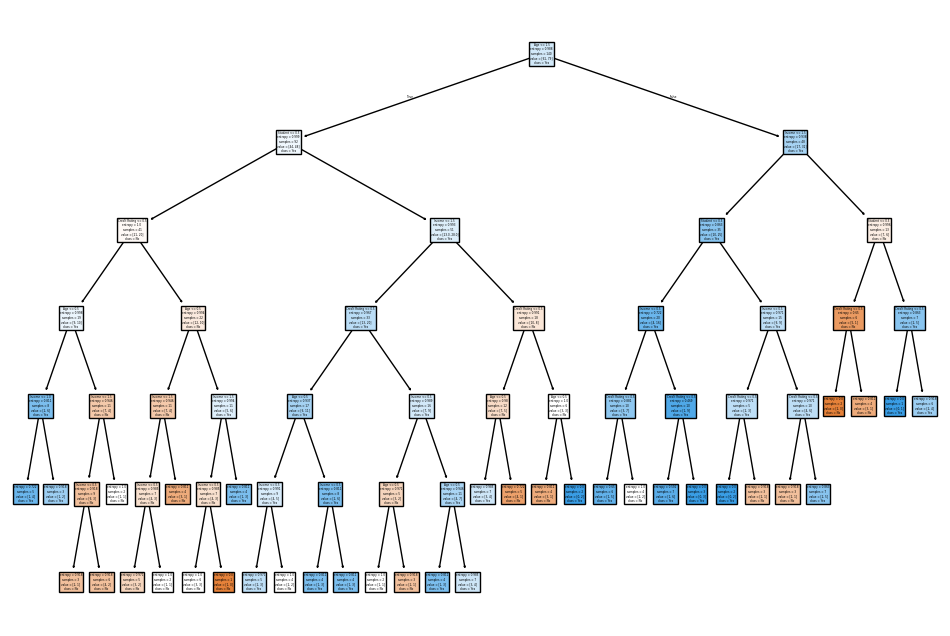

In [26]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()